# Exploring Dask Dataframes

In [2]:
!pip install "dask[complete]"
!pip3 install aiohttp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import dask.dataframe as df

In [4]:
file_name = "https://raw.githubusercontent.com/jr-marquez/DataScienceData/master/titanic.csv"
dummy_df = df.read_csv(file_name)
dummy_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [5]:
dummy_df.head(12)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,1
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,1
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,0


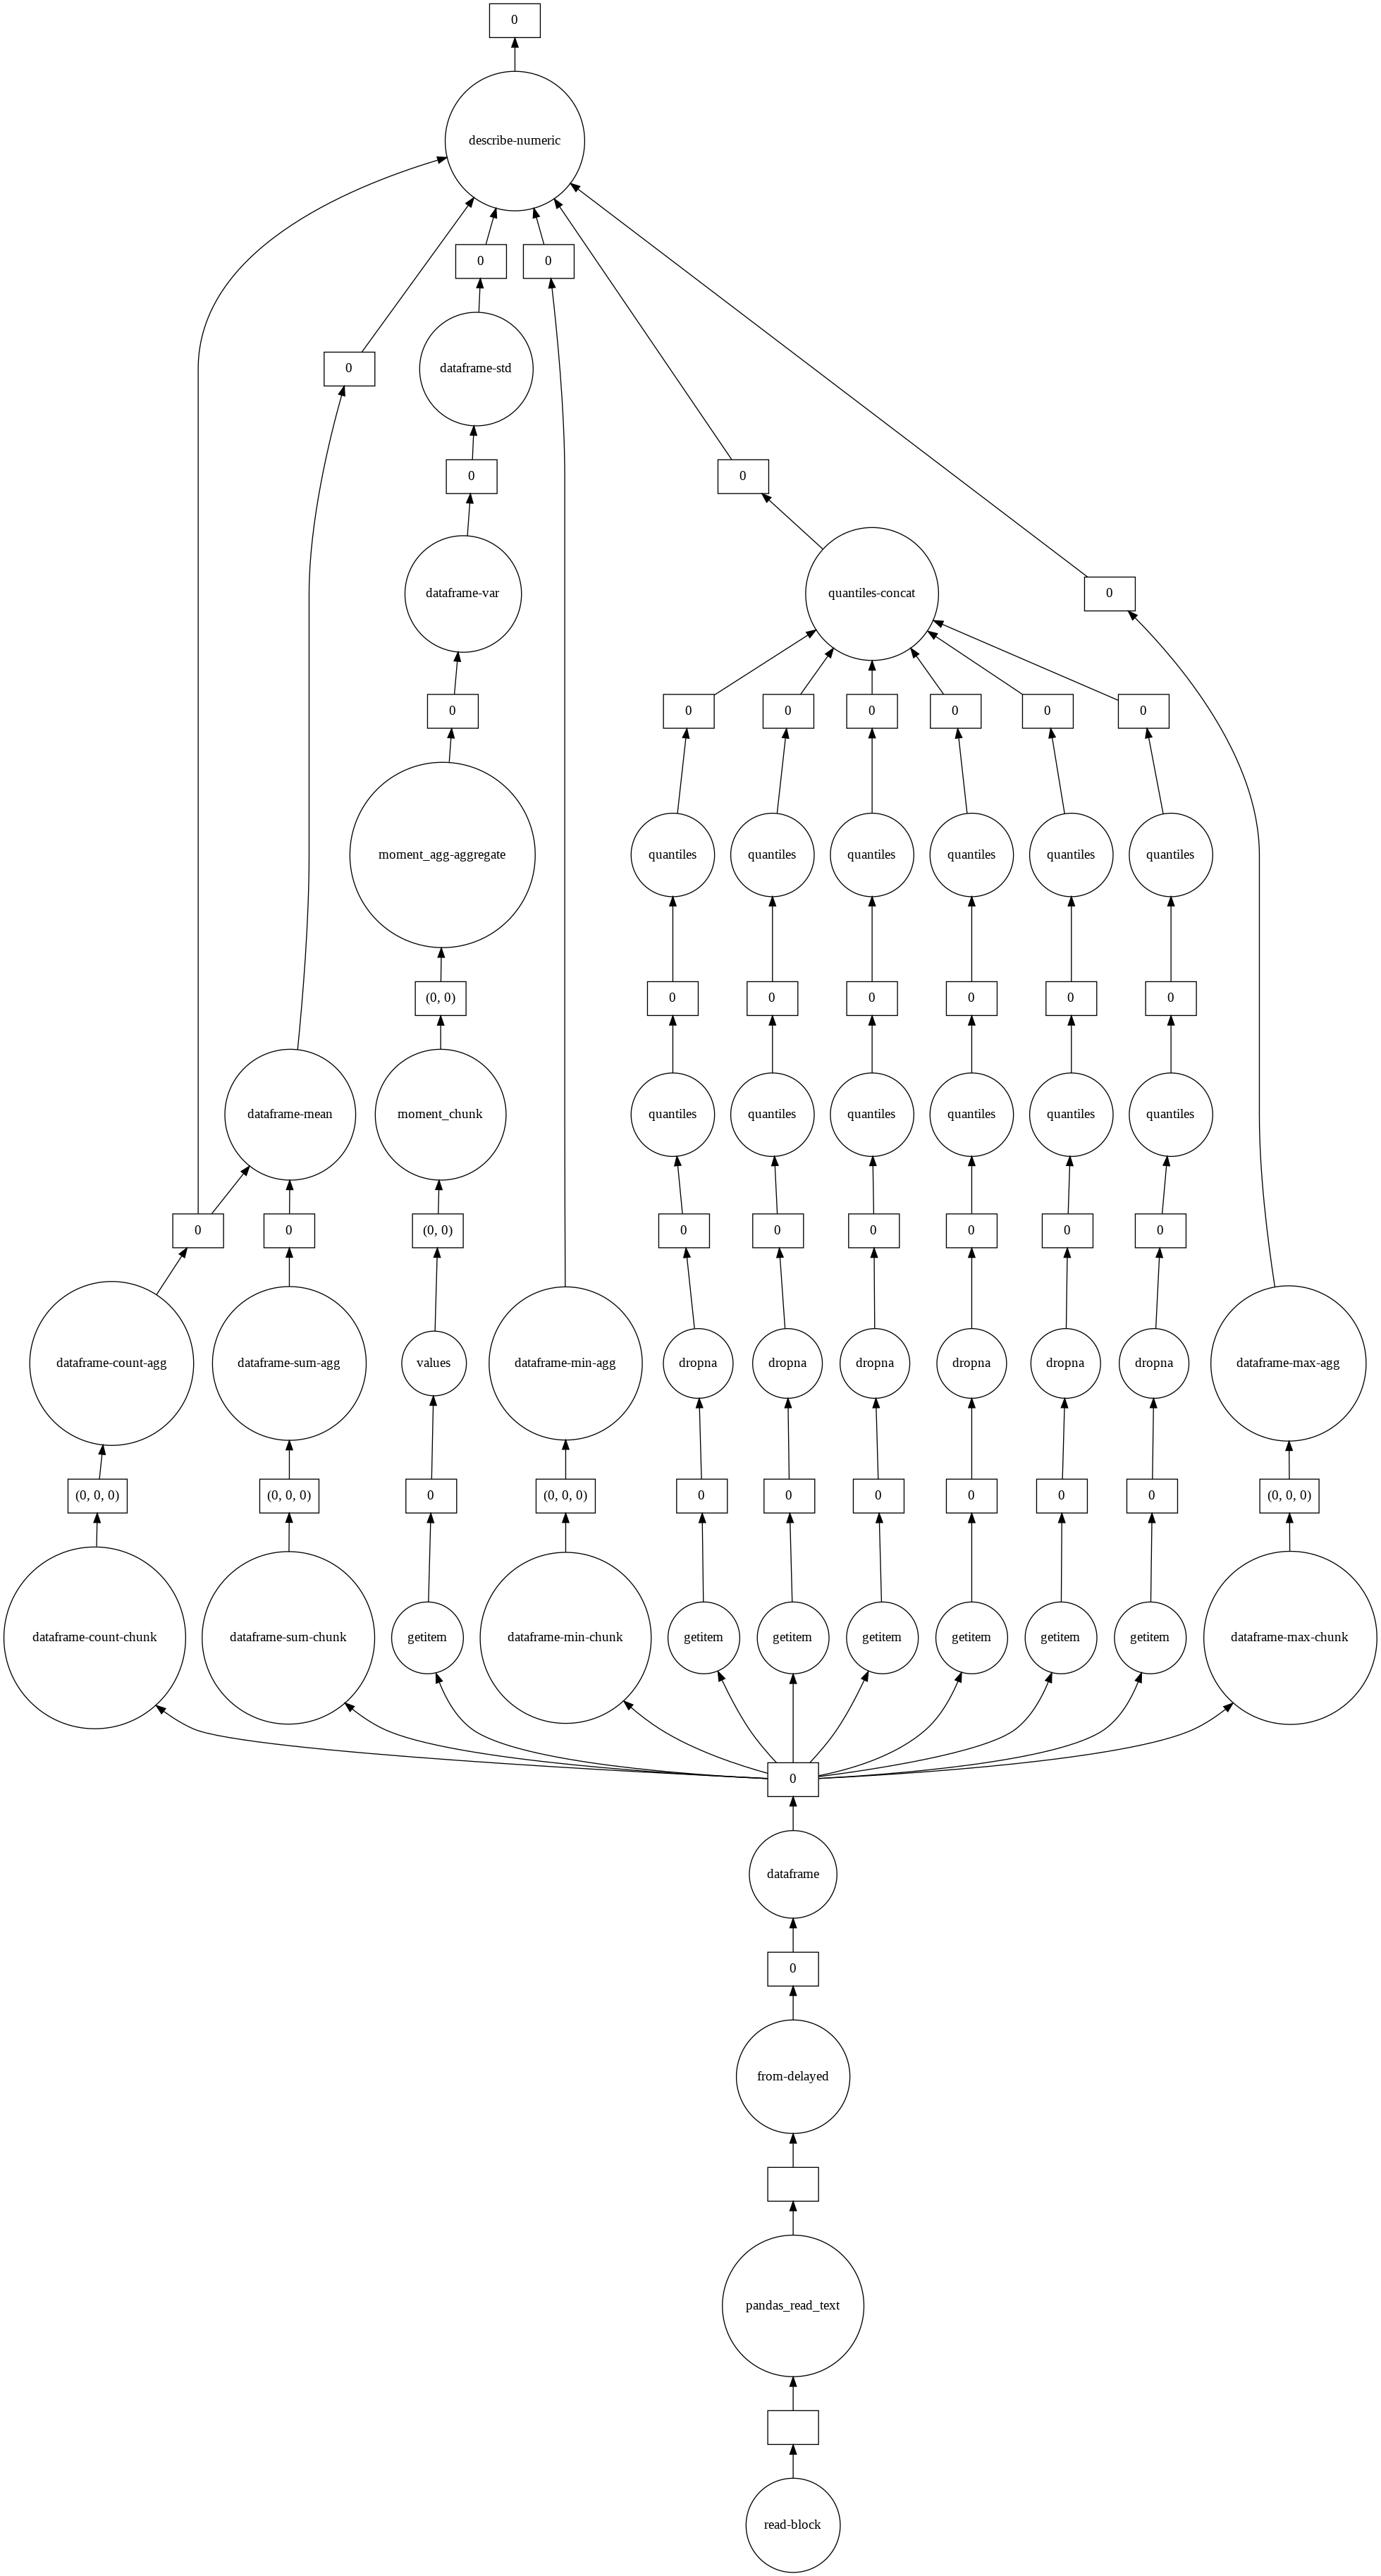

In [6]:
dummy_df.describe().visualize(filename='describe.png')

In [7]:
dummy_df.describe()

,pclass,age,sibsp,parch,fare,survived
npartitions=1,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...


In [8]:
dummy_df = dummy_df.drop('ticket', axis=1)

In [9]:
dummy_df.head()

,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,C22 C26,S,0


In [10]:
dummy_df['pclass'].unique().compute()

0    1
1    2
2    3
Name: pclass, dtype: int64

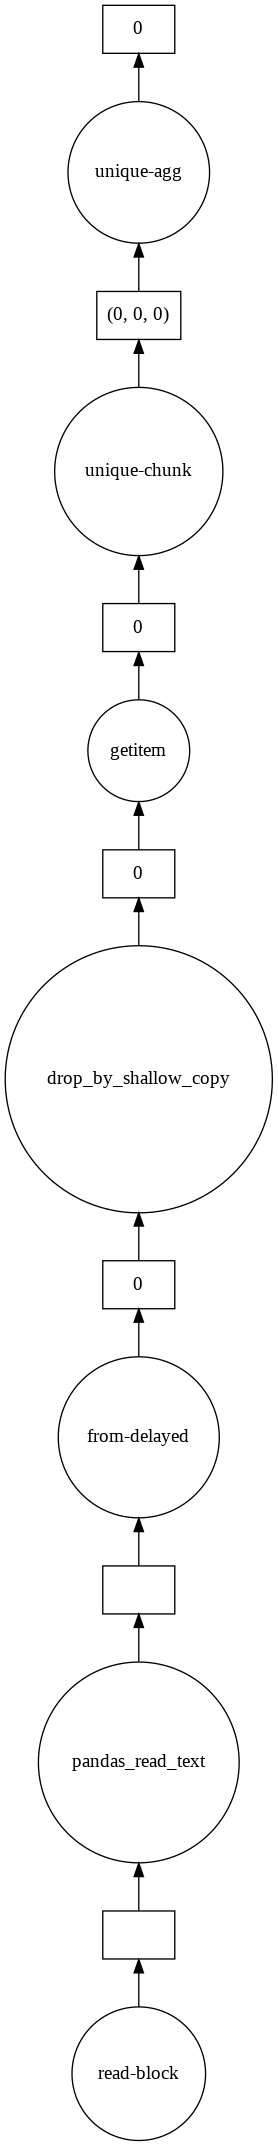

In [11]:
dummy_df['pclass'].unique().visualize()

In [12]:
dummy_df[["fare","age"]].max().compute()

fare    512.3292
age      80.0000
dtype: float64

In [13]:
#condiciones y filtrados
dummy_df[dummy_df['cabin'].notnull().compute()].compute()

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:3388: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...
1189,3,"Sandstrom, Miss. Marguerite Rut",female,4.0000,1,1,16.7000,G6,S,1
1217,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0000,0,0,7.6500,F G73,S,0
1230,3,"Strom, Miss. Telma Matilda",female,2.0000,0,1,10.4625,G6,S,0
1231,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0000,1,1,10.4625,G6,S,0
